In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Homework 3

### Import Libraries

In [2]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


##### For Validation of the Model #####
from sklearn.metrics import r2_score

#### 1. . Load Advertising.csv dataset using pandas

In [3]:
### Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### 2. Standardize each column of the dataset

In [4]:
# scaler = scale(df, axis=0, with_mean=True, with_std=True, copy=False)
# df_scaled = pd.DataFrame(scaler, columns = df.columns)
# df_scaled.index = df_scaled.index + 1
# df_scaled
df_scaled = (df - df.mean()) / df.std()
df_scaled

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


#### 3.  Add an extra column composing of all ones to X

In [5]:
x = df_scaled.drop("Sales", axis = 1)
x.insert(0, 'bias', [1]*len(df_scaled))
x

,bias,TV,Radio,Newspaper
1,1,0.967425,0.979066,1.774493
2,1,-1.194379,1.080097,0.667903
3,1,-1.512360,1.524637,1.779084
4,1,0.051919,1.214806,1.283185
5,1,0.393196,-0.839507,1.278593
...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287
197,1,-0.615491,-1.236899,-1.031011
198,1,0.348934,-0.940539,-1.109069
199,1,1.590574,1.261955,1.636743


#### 4. Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectivel

In [6]:
### Separate the predictor and the target variable 
x0 = x["bias"]
x1 = x["TV"]
x2 = x["Radio"]
x3 = x["Newspaper"]
y = df_scaled["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)


x_train size: (150, 4)
y_train size: (150,)

x_test size: (50, 4)
y_test size: (50,)


#### 5. Fit the model on the training set.

1. initialize_weights: returns a vector init_w composing of 4 uniformly distributed numbers between 0 and 1.


In [7]:
def initialize_weights():
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    return init_w
init_w = initialize_weights()

2. predict: returns a vector of the predicted value yhat

In [8]:
def predict(w, x):
    y_train_hat= np.dot(x, w) 
    #y_train_hat= np.sum(np.multiply(w, x_train), axis = 1)
    
    return y_train_hat

3. compute_cost: returns a scalar value that tells us how accurate the model is.

In [9]:
def compute_cost(y, y_hat):
    m = y.size
    return np.sum(np.square(y_hat - y)) / (2*m)

4. compute_gradient: returns a matrix w that represents the partial derivative of the cost function with respect to each parameter.

In [10]:
def compute_gradient(x, y, y_hat):
    return np.dot((y_hat - y), x)

5. update_weights: returns a 4x1 matrix that contains the updated weights.

In [11]:
def update_weights(w, a, grads, m):
    return w - (a * grads) / m

6. grad_descent: returns 2 matrices: one matrix for the weights, and one matrix for the cost values per iteration.

In [12]:
#optimal = 10000, 0.8
iterations = 10000
lr = 0.8
def grad_descent(w, x, y, iters, a):
    m = y.size
    costs = []
    for _ in range(iters):
        y_hat = predict(w, x)
        cost = compute_cost(y, y_hat)
        costs.append(cost)
        gradients = compute_gradient(x, y, y_hat)
        w = update_weights(w, a, gradients, m)
    return w, costs

w, costs = grad_descent(init_w, x_train, y_train, iterations, lr)


7. plot_costs: plot the costs as a function of iteration.

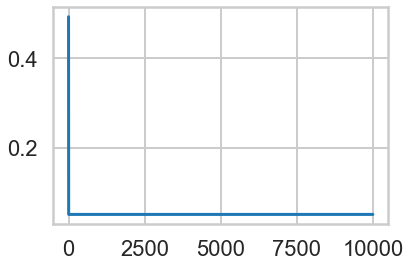

In [13]:
plt.plot(costs)

8. Predict y for train set and calculate the cost.

In [14]:
y_train_pred = predict(w, x_train)
y_train_pred_cost = compute_cost(y_train, y_train_pred)
y_train_pred_cost

0.05083950524077337

9. Predict y for test set and calculate the cost

In [15]:
y_test_pred = predict(w, x_test)
y_test_pred_cost = compute_cost(y_test, y_test_pred)
y_test_pred_cost

0.0528991124979487

#### 6. Predict the quantitative response y on the train set. Evaluate performance. You can use the MSE cost function defined for the gradient descent.

In [16]:
x_train['ŷ'] = predict(w, x_train)
x_train_mse = compute_cost(y_train, x_train['ŷ'])
x_train.head()

,bias,TV,Radio,Newspaper,ŷ
115,1,-0.801853,1.585256,0.181187,0.260179
174,1,0.248765,-1.088719,-0.815203,-0.421848
6,1,-1.611365,1.726701,2.040809,-0.248031
127,1,-1.621848,1.053156,0.920444,-0.634832
118,1,-0.822819,-1.513052,-0.723370,-1.453179


#### 7. Predict the quantitative response y on the test set. Evaluate performance. Similarly, you can use the MSE cost function defined for the gradient descent.

In [17]:
x_test['ŷ'] = predict(w, x_test)
x_test_mse = compute_cost(y_test, x_test['ŷ'])
x_test.head()

,bias,TV,Radio,Newspaper,ŷ
96,1,0.189362,0.561467,1.026052,0.452516
16,1,0.563251,1.645876,1.026052,1.322838
31,1,1.698897,0.339197,0.580661,1.455202
159,1,-1.576422,0.918447,0.672494,-0.676920
129,1,0.853278,1.733436,-1.256002,1.562908


#### 8.  Note: Since the data is standardized, you might be surprised that the predictions differ from the original data. In order to revert back a standardized data into the original form, we simply have to equate the previous equation:


In [18]:
df_revert = df_scaled * df.std() + df.mean()
df_revert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


 #### 9. Observe the cost results and analyse. 

In [19]:
print(x_test_mse)
print(x_train_mse)

0.0528991124979487
0.05083950524077337


Since the cost result or mse of the train set is less than the mse of the test set, it means that the model of the train set for predicting the sales is bettern than the test set's model. The closer the cost result or mse to 0 means that the predictors in the model will give a better quality of results for predicting the dependent variable.

### Questions:

#### 2. Scatter plot of test and train sets with their r2 values.

0.8843196200174289


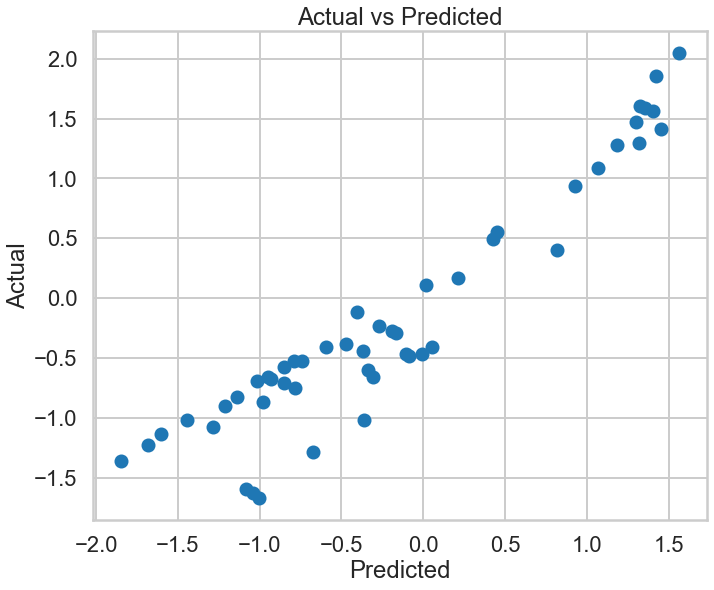

In [20]:
# test set scatter plot
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(y_test_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")

#r2 of test set
r2_test = r2_score(y_test_pred, y_test)
print(r2_test)

0.8847308591551801


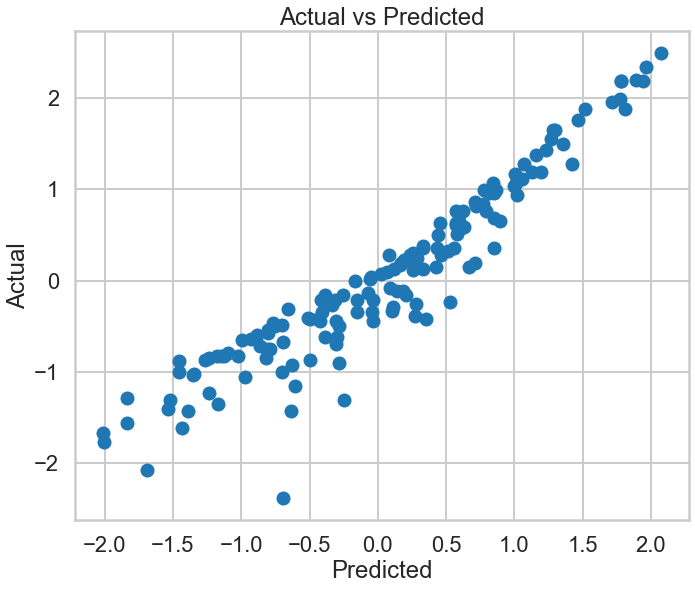

In [21]:
# test set scatter plot
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(y_train_pred, y_train)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")

#r2 of test set
r2_train = r2_score(y_train_pred, y_train)
print(r2_train)

#### 3. error, r2, and cost as the number of iterations increases

In [22]:
x_train = x_train.drop("ŷ", axis = 1)
x_test = x_test.drop("ŷ", axis = 1)

In [23]:
def error_r2(y_hat, y):
    error = y_hat - y
    r2 = r2_score(y_hat, y)
    return error, r2

r2 =  0.8847308591551801


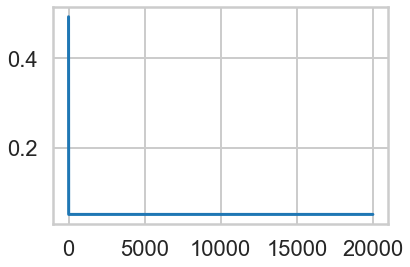

In [24]:
#20000 iterations
init_w = initialize_weights()

w, costs = grad_descent(init_w, x_train, y_train, 20000, lr)
y_hat_train = predict(w, x_train)
error, r2 = error_r2(y_hat_train, y_train)

print("r2 = ", r2)
plt.plot(costs)

Text(0.5, 1.0, 'Actual vs Error')

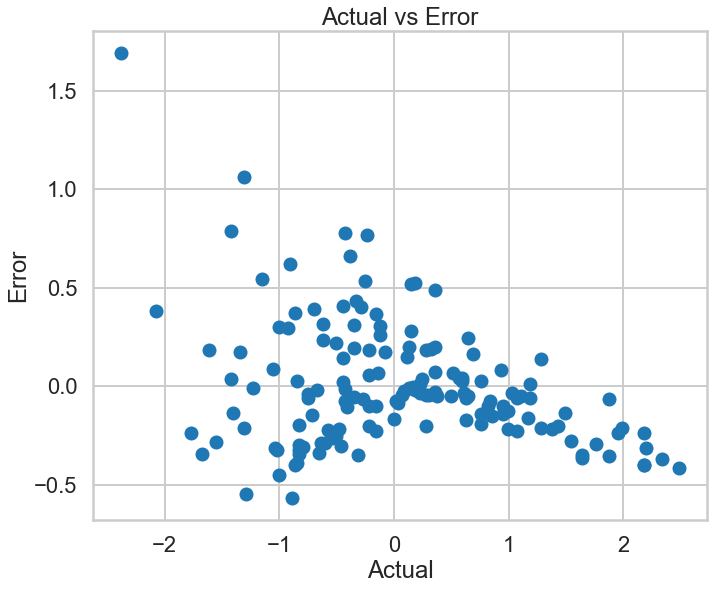

In [25]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(y_train, error)
plt.xlabel("Actual")
plt.ylabel("Error")
plt.title("Actual vs Error")

r2 =  0.8847308591551801


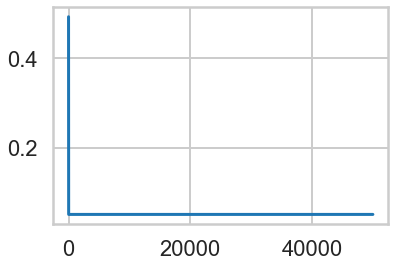

In [26]:
#50000 iterations
init_w = initialize_weights()

w, costs = grad_descent(init_w, x_train, y_train, 50000, lr)
y_hat_train = predict(w, x_train)
error, r2 = error_r2(y_hat_train, y_train)

print("r2 = ", r2)
plt.plot(costs)

Text(0.5, 1.0, 'Actual vs Error')

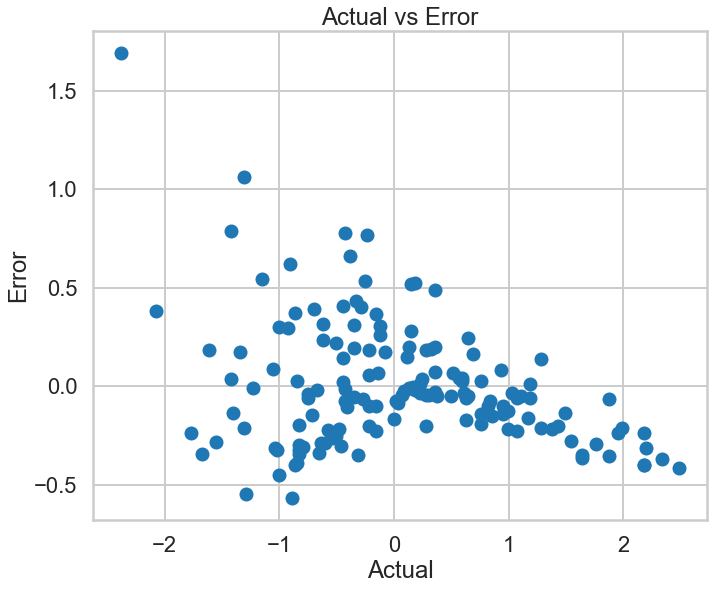

In [27]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(y_train, error)
plt.xlabel("Actual")
plt.ylabel("Error")
plt.title("Actual vs Error")

#### 4. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT.

In [28]:
#0.1, 0.01, 0.001, 0.0001, 0.2 learning rates
lrs = np.array([0.0001, 0.001, 0.01, 0.1, 0.2])
iters = np.array([10, 100, 1000, 10000, 20000])
mses = []

for i in range(5):
    init_w = initialize_weights()
    w, cost = grad_descent(init_w, x_train, y_train, iters[i], lrs[i])
    y_pred = predict(w, x_train)
    mse = compute_cost(y_train, y_pred)
    mses.append(mse)


Text(0.5, 1.0, 'Cost vs Iterations Analysis')

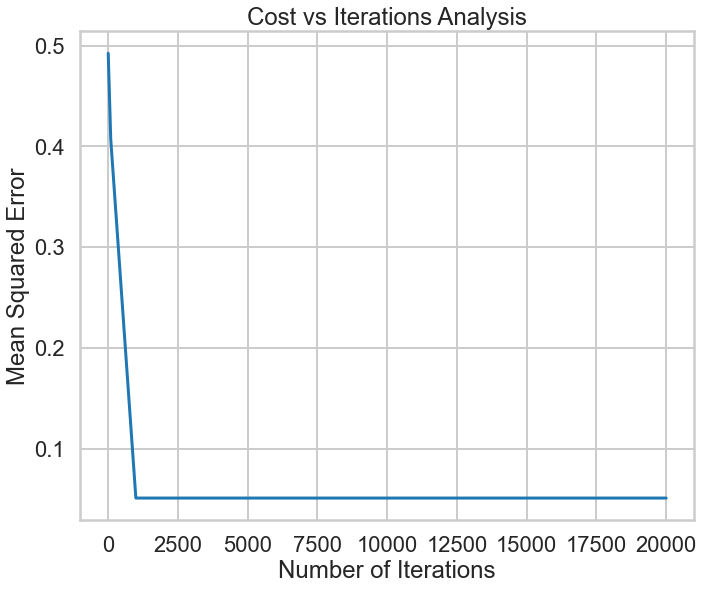

In [29]:
f, ax = plt.subplots(figsize=(11, 9))
plt.plot(iters, mses)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')